For those of you who are about to start an airbnb business in Melbourne and professional airbnb hosts,  I will be analyzing and exploring data sets from the insightsairbnb website to provide some insights, including overview of Melbourne airbnb, price setting suggestions and discussion whether reviews will affect occupancy rate.

1. Overview the Melbourne airbnb market
1.1 Price distribution in the different region and on availability days.
1.2 Price distribution under the different room type.
1.3 Airbnb hosts group division.
1.4 Price distribution in propable airbnb listing year.
1.5 price distribution in the different range of review stars and review numbers.
1.6 Review stars/Review numbers distribution in different region.
1.7 Review stars/Review numbers distribution in different room type.

2. Melbourne airbnb price setting exploaration.
2.1 The relationship between price and regions in the same room type at the same period.
2.2 The relationship between price and room types in the same region at the same period.
2.3 The relationship between price and available days in the same region at the sampe period.

3. Whether reviews affect occupancy rate.

## dataset overview

In [1]:
# prepare
import pandas as pd
import warnings
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [10,10]
sns.set_theme(style = 'darkgrid')

In [2]:
# read dataset
df_melb = pd.read_csv('listings.csv.gz',compression='gzip')
df_melb.shape #(17551,74)
df_melb.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1273635,https://www.airbnb.com/rooms/1273635,20220606014126,2022-06-06,Private double room in Melbourne,A comfortable double bedroom with private bath...,Within 100 metres of our home is the Donburn s...,https://a0.muscache.com/pictures/f79ef227-3482...,6692322,https://www.airbnb.com/users/show/6692322,Barry,2013-06-02,"Melbourne, Victoria, Australia",I am from Melbourne Australia intending to vis...,a few days or more,0%,0%,f,https://a0.muscache.com/im/users/6692322/profi...,https://a0.muscache.com/im/users/6692322/profi...,NaN,1.0,1.0,"['email', 'phone']",t,f,"Doncaster East, Victoria, Australia",Manningham,NaN,-37.78438,145.16477,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,"[""Free street parking"", ""Extra pillows and bla...",$106.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,29,59,89,179,2022-06-06,1,0,0,2019-06-18,2019-06-18,5.0,5.00,5.00,5.00,5.00,5.00,5.00,NaN,t,1,0,1,0,0.03
1,1273768,https://www.airbnb.com/rooms/1273768,20220606014126,2022-06-06,Fortnightly or Monthly Rental close to CBD,Compact apartment with all the necessities for...,Great cafes just a short stroll from the front...,https://a0.muscache.com/pictures/19203077/cfc3...,6933179,https://www.airbnb.com/users/show/6933179,Alex,2013-06-16,"Docklands, Victoria, Australia",Work at Icehouse Docklands Victoria\r\n,within an hour,100%,100%,f,https://a0.muscache.com/im/users/6933179/profi...,https://a0.muscache.com/im/users/6933179/profi...,Collingwood/Fitzroy,1.0,1.0,"['email', 'phone']",t,t,"Fitzroy, Victoria, Australia",Yarra,NaN,-37.80759,144.97821,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Free street parking"", ""Extra pillows and bla...",$86.00,14,1125,14,14,1125,1125,14.0,1125.0,NaN,t,1,1,30,305,2022-06-06,47,6,0,2013-07-19,2022-03-06,4.6,4.87,4.67,4.93,4.83,4.93,4.72,NaN,f,1,1,0,0,0.43


In [3]:
df_list = pd.read_csv('listings.csv')
df_list.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,633258,Hip sun drenched Windsor apartment,440653,Rob,NaN,Stonnington,-37.85437,144.99488,Entire home/apt,74,2,17,2018-06-28,0.14,1,0,0,NaN
1,1273635,Private double room in Melbourne,6692322,Barry,NaN,Manningham,-37.78438,145.16477,Private room,106,1,1,2019-06-18,0.03,1,179,0,NaN


In [55]:
# dataset overview
df_melb.duplicated().sum() #0
#df_melb.info()

0

In [5]:
df_list.isnull().sum().sort_values(ascending=False) 

license                           17551
neighbourhood_group               17551
reviews_per_month                  3638
last_review                        3638
host_name                             3
name                                  2
number_of_reviews                     0
number_of_reviews_ltm                 0
availability_365                      0
calculated_host_listings_count        0
id                                    0
minimum_nights                        0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
host_id                               0
price                                 0
dtype: int64

## Preprocess


In [6]:
#fill 3 null value by the first review date
df_melb.loc[df_melb['host_since'].isnull(),'host_since'] = df_melb.loc[df_melb['host_since'].isnull()]['first_review']

In [7]:
# Split year and month
df_melb['date'] = pd.to_datetime(df_melb['host_since'])
df_melb['year'],df_melb['month'] = df_melb['date'].apply(lambda x: int(x.year)),df_melb['date'].apply(lambda x: int(x.month))
df_melb[['date','year','month']].head(2)

,date,year,month
0,2013-06-02,2013,6
1,2013-06-16,2013,6


In [8]:
# Convert price format from string with $ to float without $
df_melb[['price']] = df_melb[['price']].replace('[\$,]','',regex=True).astype(float)
df_melb['price'][:2]

0    106.0
1     86.0
Name: price, dtype: float64

In [9]:
# fill null value of bathrooms text
df_melb['bathrooms_text'].isnull().sum() # 20
df_melb['bathrooms_text'].fillna('1',inplace=True)
df_melb['bathrooms_text'].isnull().sum() #0

0

In [10]:
# fill null value of bedrooms
df_melb['bedrooms'].fillna('1',inplace=True)
df_melb['bedrooms'].isnull().sum()

0

In [11]:
# convert string to int 
df_melb['accommodates'] = df_melb['accommodates'].astype(int)

The quality of dataset looks good. Total 17,751 records and 77 variables. But some features like host_neighbourhood has more than a half null value, we will not consider them.  
Preprocession has been done,including,
1. Filled the only 1 missing value of host since date by first_review. 
2. Filled the 20 missing 'bathrooms_text'by 1.
3. Filled the 20 missing 'bedrooms' by 1.
4. Extracted the year and month value.
5. Extract digit value without '$' from price.
6. Convert string data type of 'accommodates' to integer.

## Overview Airbnb in Melbourne
### Distribution in Region

In [12]:
df_region = df_list[['id','neighbourhood','room_type','price']]   
year = df_melb[['id','year']]
df_region = df_region.merge(year,on='id',how='left')
df_region.head(2)

,id,neighbourhood,room_type,price,year
0,633258,Stonnington,Entire home/apt,74,2011
1,1273635,Manningham,Private room,106,2013


In [13]:
df_region.describe()

,id,price,year
count,1.755100e+04,17551.000000,17551.000000
mean,6.516760e+16,211.886217,2016.088200
std,1.861660e+17,465.608702,2.492535
min,9.835000e+03,0.000000,2009.000000
25%,1.867477e+07,80.000000,2014.000000
50%,3.176048e+07,136.000000,2016.000000
75%,4.688197e+07,217.000000,2018.000000
max,6.424434e+17,15000.000000,2022.000000


In [14]:
df_region.describe(include='object')

,neighbourhood,room_type
count,17551,17551
unique,30,4
top,Melbourne,Entire home/apt
freq,5188,11996


In [15]:
melb_map = geopandas.read_file('neighbourhoods.geojson')
melb_map.head(2)

,neighbourhood,neighbourhood_group,geometry
0,Greater Dandenong,None,"MULTIPOLYGON (((145.14170 -37.93139, 145.14255..."
1,Wyndham,None,"MULTIPOLYGON (((144.82749 -37.82280, 144.82654..."


In [16]:
df_count = df_region['neighbourhood'].value_counts().reset_index()
df_count = df_count.rename(columns={'index':'neighbourhood','neighbourhood':'counts'})
df_count['counts'] = df_count['counts'].astype(int)
df_count_o = df_count.sort_values(by=['counts'],ascending=False)[:6]
count_region = melb_map.merge(df_count,on = 'neighbourhood',how='left')
count_region.head(2)

,neighbourhood,neighbourhood_group,geometry,counts
0,Greater Dandenong,None,"MULTIPOLYGON (((145.14170 -37.93139, 145.14255...",116
1,Wyndham,None,"MULTIPOLYGON (((144.82749 -37.82280, 144.82654...",399


In [17]:
df_price = df_region.groupby(['neighbourhood'])['price'].median().reset_index()
df_price_o = df_price.sort_values(by=['price'],ascending=False)[:6]
price_region = melb_map.merge(df_price,on='neighbourhood',how='left')
price_region.head(2)

,neighbourhood,neighbourhood_group,geometry,price
0,Greater Dandenong,None,"MULTIPOLYGON (((145.14170 -37.93139, 145.14255...",80.0
1,Wyndham,None,"MULTIPOLYGON (((144.82749 -37.82280, 144.82654...",90.0


Text(0.5, 1.0, 'Price distribution')

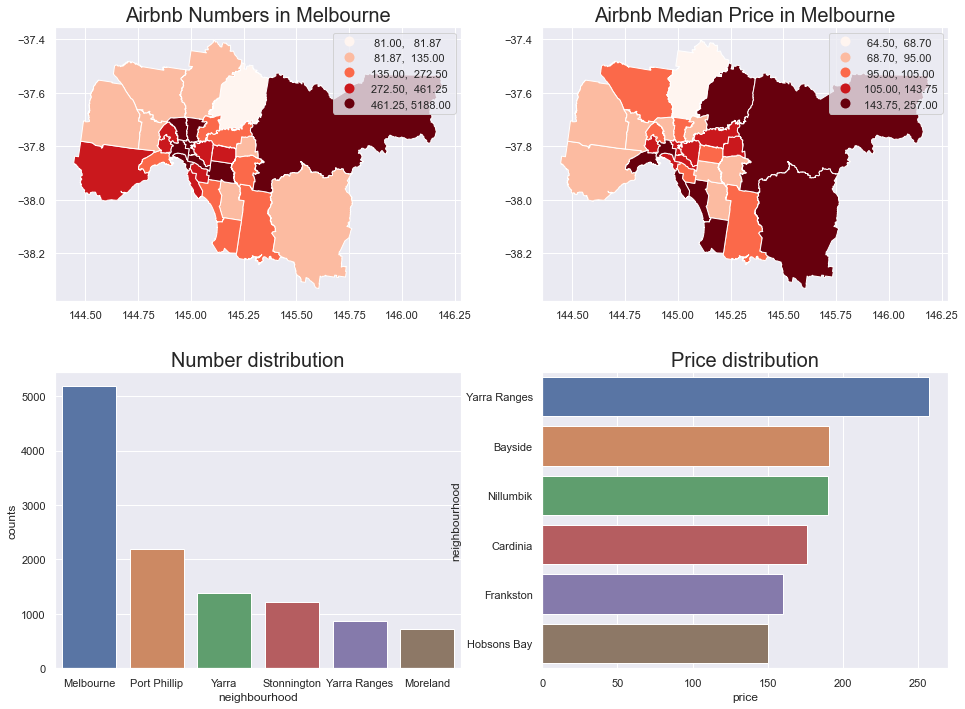

In [18]:
fig,axs = plt.subplots(2,2,figsize=(16,12))
count_region.plot(column = 'counts',ax=axs[0,0],legend = True,cmap='Reds',scheme='Percentiles',
                 classification_kwds={'pct':[1,25,50,75,100]})
axs[0,0].set_title('Airbnb Numbers in Melbourne',fontsize=20)

price_region.plot(column = 'price',ax=axs[0,1],legend = True,cmap='Reds',scheme='Percentiles',
                  classification_kwds={'pct':[1,25,50,75,100]})
axs[0,1].set_title('Airbnb Median Price in Melbourne',fontsize=20)

sns.barplot(x='neighbourhood',y='counts',data=df_count_o,ax=axs[1,0])
axs[1,0].set_title('Number distribution',fontsize=20)

sns.barplot(x='price',y='neighbourhood',data=df_price_o,ax=axs[1,1])
axs[1,1].set_title('Price distribution',fontsize=20)


The plots above show that most airbnb locates in the center and the west of Melbourne. And Airbnb in west and coastal areas are more expensive than other council areas.Number of airbnb in Melbourne council are much higher than other council areas,but the price is differnt view. Yarra ranges has the highest median price of airbnbs.

#### Distribution by Room type

In [19]:
df_room = df_melb[['id','room_type','price','bathrooms_text','bedrooms','accommodates']]
roomtype_count = df_room['room_type'].value_counts()
roomtype_total = df_room['room_type'].count()

roomtype_price = df_room[df_room['price']<800]

In [20]:
def make_autopct(value):
    def my_autopct(pct):
        total = sum(value)
        val = int(round(pct*total/100.0))
        return '{p:.1f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

Text(0.5, 1.0, 'Airbnb price in different room type')

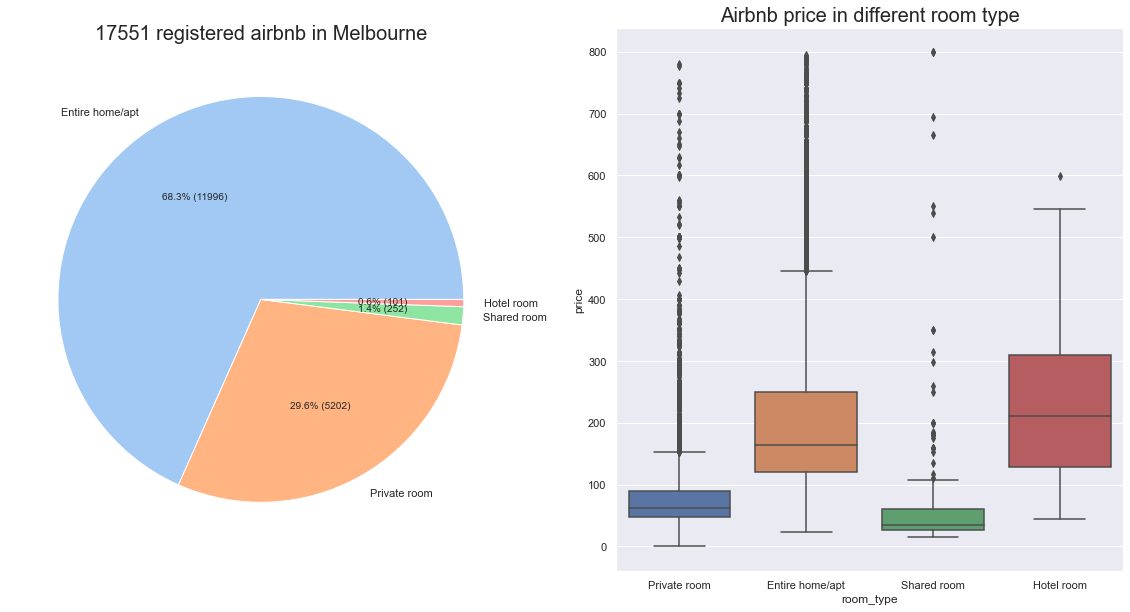

In [21]:
fig,axs = plt.subplots(1,2,figsize=(20,10))

colors = sns.color_palette('pastel')[0:4]
labels=['Entire home/apt','Private room','Shared room','Hotel room']
axs[0].pie(roomtype_count,labels = labels,colors=colors,autopct=make_autopct(roomtype_count))
axs[0].set_title('%d registered airbnb in Melbourne' %roomtype_total, fontsize=20)

sns.boxplot(x='room_type',y='price',data = roomtype_price, ax=axs[1])
axs[1].set_title('Airbnb price in different room type',fontsize=20)

### Distribution by time

In [22]:
df_dy = df_melb[['id','year','month','price']]
count_year = df_dy.groupby('year')['id'].count().reset_index()
price_year = df_dy.groupby('year')['price'].median().reset_index()
count_year = count_year.rename(columns={'id':'number'})

count_month = df_dy.groupby('month')['id'].count().reset_index()
price_month = df_dy.groupby('month')['price'].median().reset_index()
count_month = count_month.rename(columns={'id':'number'})

Text(0.5, 1.0, 'Airbnb Median price by Month')

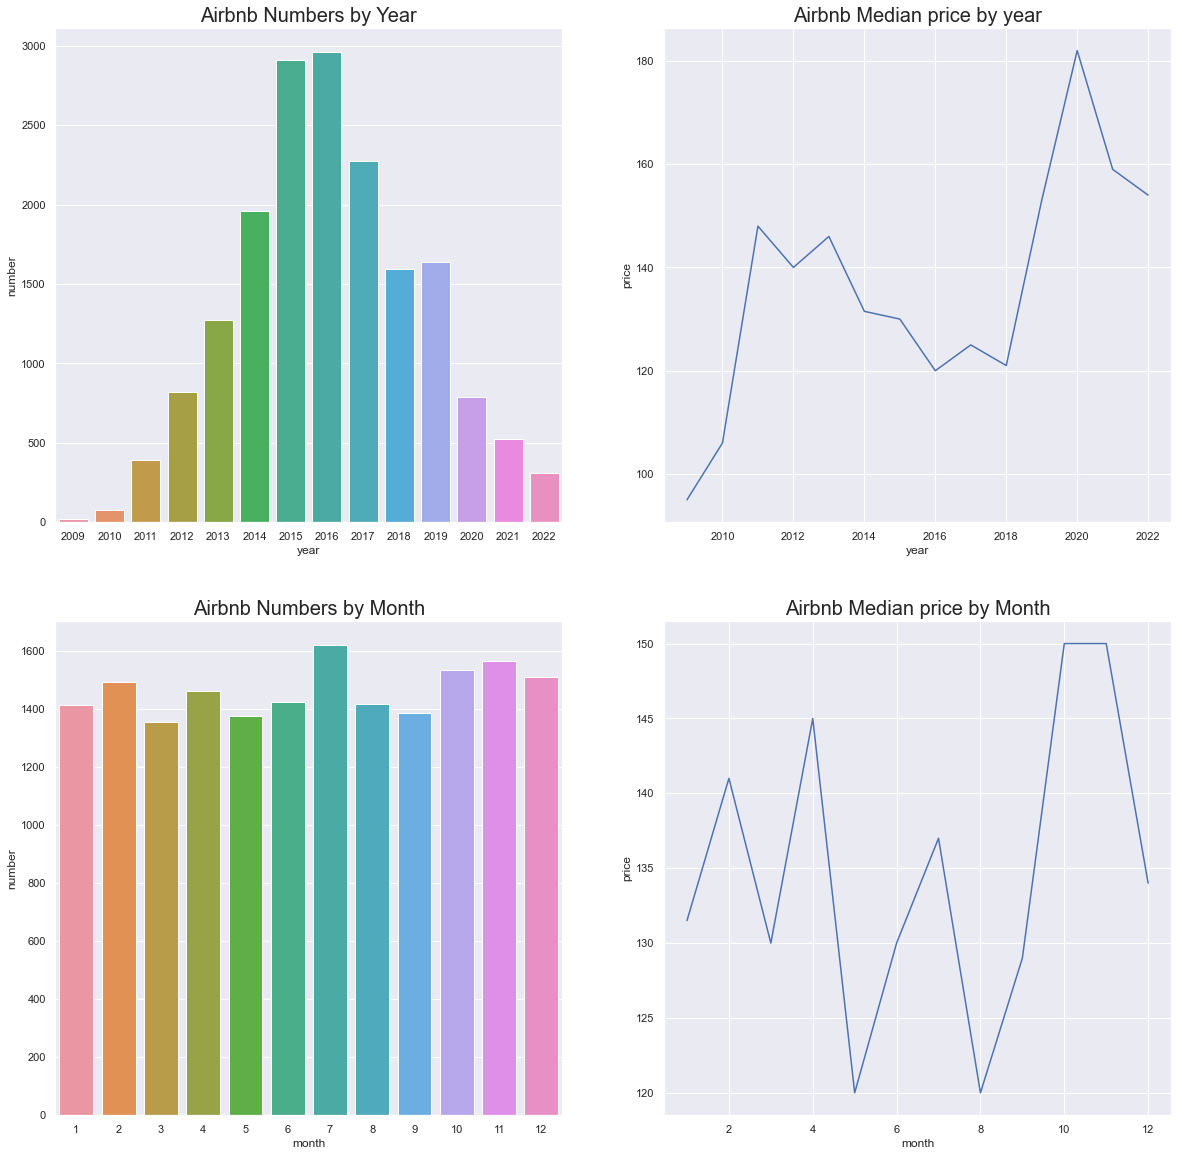

In [23]:
fig,axs = plt.subplots(2,2,figsize=(20,20))
sns.barplot(x='year',y='number',data=count_year,ax=axs[0,0])
axs[0,0].set_title('Airbnb Numbers by Year',fontsize=20)
sns.lineplot(x='year',y='price',data=price_year,ax=axs[0,1])
axs[0,1].set_title('Airbnb Median price by year',fontsize=20)

sns.barplot(x='month',y='number',data=count_month,ax=axs[1,0])
axs[1,0].set_title('Airbnb Numbers by Month',fontsize=20)
sns.lineplot(x='month',y='price',data=price_month,ax=axs[1,1])
axs[1,1].set_title('Airbnb Median price by Month',fontsize=20)

## Feature analysis

### Region

In [24]:
df_region['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [25]:
df_s = df_region[df_region['room_type']=='Shared room']
df_s = df_s['neighbourhood'].value_counts().reset_index()

df_s = df_s.rename(columns={'index':'neighbourhood','neighbourhood':'counts'})
df_s['counts'] = df_s['counts'].astype(int)
count_s = melb_map.merge(df_s,on = 'neighbourhood',how='left')
count_s.head(2)

,neighbourhood,neighbourhood_group,geometry,counts
0,Greater Dandenong,None,"MULTIPOLYGON (((145.14170 -37.93139, 145.14255...",8.0
1,Wyndham,None,"MULTIPOLYGON (((144.82749 -37.82280, 144.82654...",3.0


In [26]:

df_h = df_region[df_region['room_type']=='Hotel room']
df_h = df_h['neighbourhood'].value_counts().reset_index()

df_h = df_h.rename(columns={'index':'neighbourhood','neighbourhood':'counts'})
df_h['counts'] = df_h['counts'].astype(int)
count_h = melb_map.merge(df_h,on = 'neighbourhood',how='left')
count_h.head(2)

,neighbourhood,neighbourhood_group,geometry,counts
0,Greater Dandenong,None,"MULTIPOLYGON (((145.14170 -37.93139, 145.14255...",NaN
1,Wyndham,None,"MULTIPOLYGON (((144.82749 -37.82280, 144.82654...",2.0


In [27]:
df_e = df_region[df_region['room_type']=='Entire home/apt']
df_e= df_e['neighbourhood'].value_counts().reset_index()

df_e = df_e.rename(columns={'index':'neighbourhood','neighbourhood':'counts'})
df_e['counts'] = df_e['counts'].astype(int)
count_e = melb_map.merge(df_e,on = 'neighbourhood',how='left')
count_e.head(2)

,neighbourhood,neighbourhood_group,geometry,counts
0,Greater Dandenong,None,"MULTIPOLYGON (((145.14170 -37.93139, 145.14255...",39
1,Wyndham,None,"MULTIPOLYGON (((144.82749 -37.82280, 144.82654...",153


In [28]:
df_p = df_region[df_region['room_type']=='Private room']
df_p= df_p['neighbourhood'].value_counts().reset_index()

df_p = df_p.rename(columns={'index':'neighbourhood','neighbourhood':'counts'})
df_p['counts'] = df_p['counts'].astype(int)
count_p = melb_map.merge(df_p,on = 'neighbourhood',how='left')
count_p.head(2)

,neighbourhood,neighbourhood_group,geometry,counts
0,Greater Dandenong,None,"MULTIPOLYGON (((145.14170 -37.93139, 145.14255...",69
1,Wyndham,None,"MULTIPOLYGON (((144.82749 -37.82280, 144.82654...",241


Text(0.5, 1.0, 'Shared room')

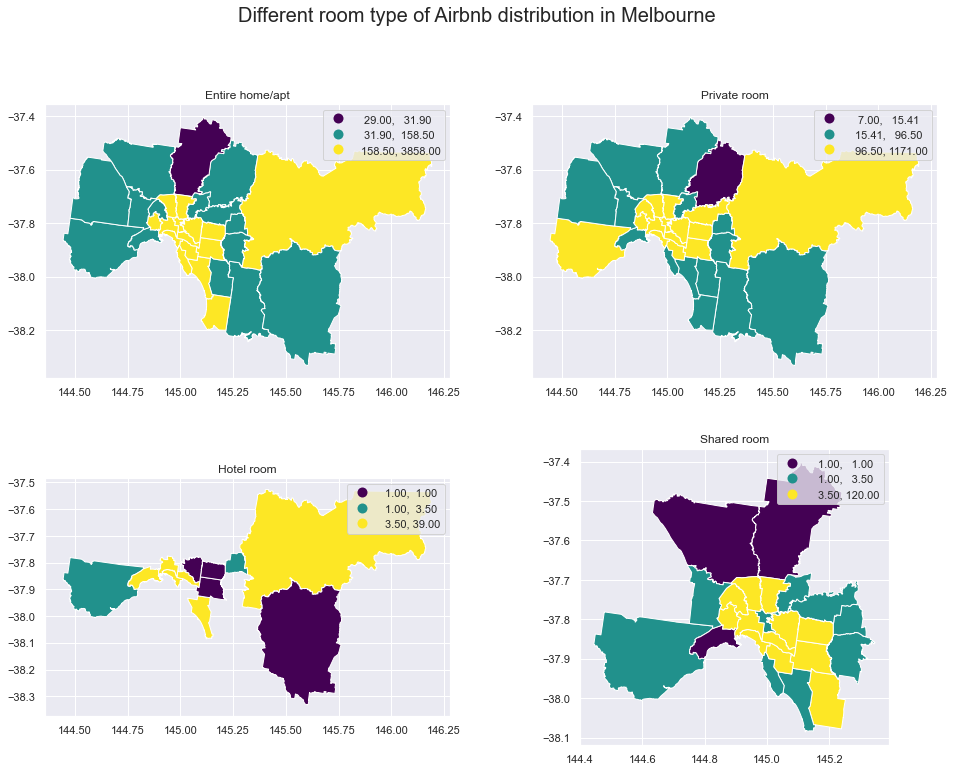

In [29]:
fig,axs = plt.subplots(2,2,figsize=(16,12))
fig.suptitle('Different room type of Airbnb distribution in Melbourne',fontsize=20)

count_e.plot(column='counts',ax=axs[0,0],legend=True,scheme='Percentiles',classification_kwds={'pct':[1,50,100]})
axs[0,0].set_title('Entire home/apt',fontsize=12)

count_p.plot(column='counts',ax=axs[0,1],legend=True,scheme='Percentiles',classification_kwds={'pct':[1,50,100]})
axs[0,1].set_title('Private room',fontsize=12)

count_h.plot(column='counts',ax=axs[1,0],legend=True,scheme='Percentiles',classification_kwds={'pct':[1,50,100]})
axs[1,0].set_title('Hotel room',fontsize=12)

count_s.plot(column='counts',ax=axs[1,1],legend=True,scheme='Percentiles',classification_kwds={'pct':[1,50,100]})
axs[1,1].set_title('Shared room',fontsize=12)

In [30]:
df_region[df_region['neighbourhood']=='Nillumbik']['year'].value_counts()

2014    15
2017    15
2015    14
2018    11
2016    10
2013     6
2019     4
2021     4
2012     2
Name: year, dtype: int64

In [31]:
df_count_2009 = df_region[df_region['year']==2009]['neighbourhood'].value_counts().reset_index()
df_count_2009 = df_count_2009.rename(columns={'index':'neighbourhood','neighbourhood':'counts'})
df_count_2009['counts'] = df_count_2009['counts'].astype(int)
count_region_2009 = melb_map.merge(df_count_2009,on = 'neighbourhood',how='left')
count_region_2009.head(2)

df_count_2010 = df_region[df_region['year']==2010]['neighbourhood'].value_counts().reset_index()
df_count_2010 = df_count_2010.rename(columns={'index':'neighbourhood','neighbourhood':'counts'})
df_count_2010['counts'] = df_count_2010['counts'].astype(int)
count_region_2010 = melb_map.merge(df_count_2010,on = 'neighbourhood',how='left')
count_region_2010.head(2)

df_count_2011 = df_region[df_region['year']==2011]['neighbourhood'].value_counts().reset_index()
df_count_2011 = df_count_2011.rename(columns={'index':'neighbourhood','neighbourhood':'counts'})
df_count_2011['counts'] = df_count_2011['counts'].astype(int)
count_region_2011 = melb_map.merge(df_count_2011,on = 'neighbourhood',how='left')
count_region_2011.head(2)


df_count_2013 = df_region[df_region['year']==2013]['neighbourhood'].value_counts().reset_index()
df_count_2013 = df_count_2013.rename(columns={'index':'neighbourhood','neighbourhood':'counts'})
df_count_2013['counts'] = df_count_2013['counts'].astype(int)
count_region_2013 = melb_map.merge(df_count_2013,on = 'neighbourhood',how='left')
count_region_2013.head(2)  

df_count_2014 = df_region[df_region['year']==2014]['neighbourhood'].value_counts().reset_index()
df_count_2014 = df_count_2014.rename(columns={'index':'neighbourhood','neighbourhood':'counts'})
df_count_2014['counts'] = df_count_2014['counts'].astype(int)
count_region_2014 = melb_map.merge(df_count_2014,on = 'neighbourhood',how='left')
count_region_2014.head(2)

df_count_2015 = df_region[df_region['year']==2015]['neighbourhood'].value_counts().reset_index()
df_count_2015 = df_count_2015.rename(columns={'index':'neighbourhood','neighbourhood':'counts'})
df_count_2015['counts'] = df_count_2015['counts'].astype(int)
count_region_2015 = melb_map.merge(df_count_2015,on = 'neighbourhood',how='left')
count_region_2015.head(2)

df_count_2020 = df_region[df_region['year']==2020]['neighbourhood'].value_counts().reset_index()
df_count_2020 = df_count_2020.rename(columns={'index':'neighbourhood','neighbourhood':'counts'})
df_count_2020['counts'] = df_count_2020['counts'].astype(int)
count_region_2020 = melb_map.merge(df_count_2020,on = 'neighbourhood',how='left')
count_region_2020.head(2)

df_count_2021 = df_region[df_region['year']==2021]['neighbourhood'].value_counts().reset_index()
df_count_2021 = df_count_2021.rename(columns={'index':'neighbourhood','neighbourhood':'counts'})
df_count_2021['counts'] = df_count_2021['counts'].astype(int)
count_region_2021 = melb_map.merge(df_count_2021,on = 'neighbourhood',how='left')
count_region_2021.head(2)

df_count_2022 = df_region[df_region['year']==2022]['neighbourhood'].value_counts().reset_index()
df_count_2022 = df_count_2022.rename(columns={'index':'neighbourhood','neighbourhood':'counts'})
df_count_2022['counts'] = df_count_2022['counts'].astype(int)
count_region_2022 = melb_map.merge(df_count_2022,on = 'neighbourhood',how='left')
count_region_2022.head(2)

,neighbourhood,neighbourhood_group,geometry,counts
0,Greater Dandenong,None,"MULTIPOLYGON (((145.14170 -37.93139, 145.14255...",8.0
1,Wyndham,None,"MULTIPOLYGON (((144.82749 -37.82280, 144.82654...",4.0


[Text(0.5, 1.0, '2022')]

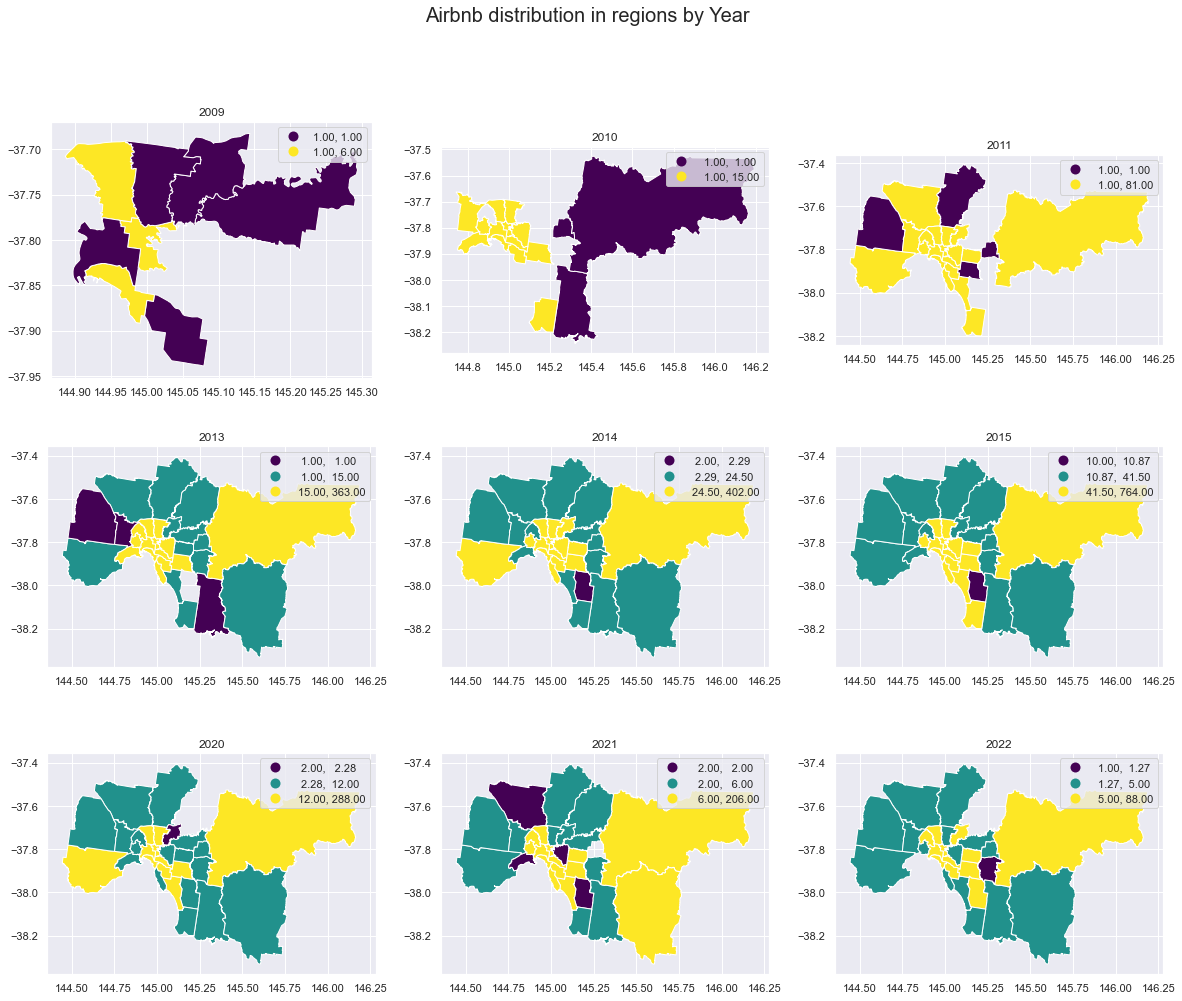

In [32]:
fig,axs = plt.subplots(3,3,figsize=(20,16))
fig.suptitle('Airbnb distribution in regions by Year',fontsize=20)
count_region_2009.plot(column = 'counts',ax=axs[0,0],legend = True,scheme='Percentiles',classification_kwds={'pct':[1,100]}).set(title='2009')

count_region_2010.plot(column = 'counts',ax=axs[0,1],legend = True,scheme='Percentiles',classification_kwds={'pct':[1,100]}).set(title='2010')


count_region_2011.plot(column = 'counts',ax=axs[0,2],legend = True,scheme='Percentiles',classification_kwds={'pct':[1,100]}).set(title='2011')

count_region_2013.plot(column = 'counts',ax=axs[1,0],legend = True,scheme='Percentiles',classification_kwds={'pct':[1,50,100]}).set(title='2013')

count_region_2014.plot(column = 'counts',ax=axs[1,1],legend = True,scheme='Percentiles',classification_kwds={'pct':[1,50,100]}).set(title='2014')

count_region_2015.plot(column = 'counts',ax=axs[1,2],legend = True,scheme='Percentiles',classification_kwds={'pct':[1,50,100]}).set(title='2015')

count_region_2020.plot(column = 'counts',ax=axs[2,0],legend = True,scheme='Percentiles',classification_kwds={'pct':[1,50,100]}).set(title='2020')

count_region_2021.plot(column = 'counts',ax=axs[2,1],legend = True,scheme='Percentiles',classification_kwds={'pct':[1,50,100]}).set(title='2021')

count_region_2022.plot(column = 'counts',ax=axs[2,2],legend = True,scheme='Percentiles',classification_kwds={'pct':[1,50,100]}).set(title='2022')

In [33]:
df_r = df_region[(df_region['room_type']=='Entire home/apt')|(df_region['room_type']=='Private room')]
df_price_2013 = df_r[(df_r['year']==2013)].groupby(['neighbourhood'])['price'].median().reset_index()
price_region_2013 = melb_map.merge(df_price_2013,on='neighbourhood',how='left')

df_price_2015 = df_r[(df_r['year']==2015)].groupby(['neighbourhood'])['price'].median().reset_index()
price_region_2015 = melb_map.merge(df_price_2015,on='neighbourhood',how='left')

df_price_2017 = df_r[(df_r['year']==2017)].groupby(['neighbourhood'])['price'].median().reset_index()
price_region_2017 = melb_map.merge(df_price_2017,on='neighbourhood',how='left')
price_region_2013.head(2)

,neighbourhood,neighbourhood_group,geometry,price
0,Greater Dandenong,None,"MULTIPOLYGON (((145.14170 -37.93139, 145.14255...",NaN
1,Wyndham,None,"MULTIPOLYGON (((144.82749 -37.82280, 144.82654...",56.5


[Text(0.5, 1.0, '2017')]

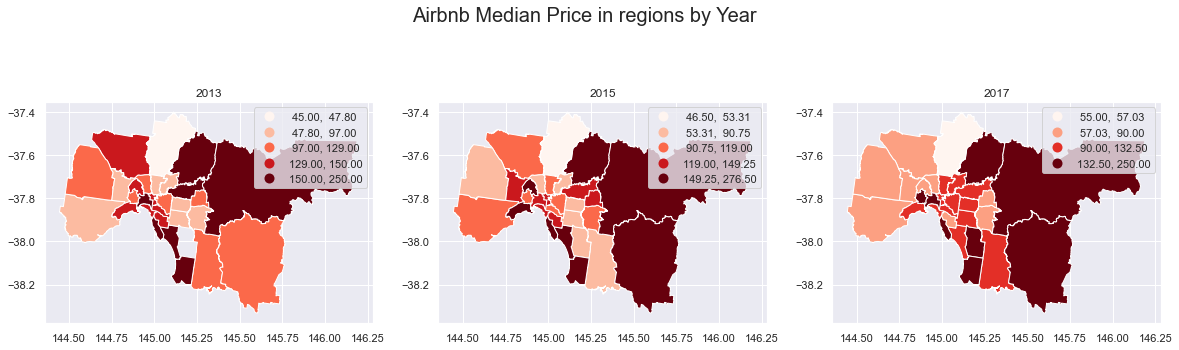

In [34]:
fig,axs = plt.subplots(1,3,figsize=(20,6))
fig.suptitle('Airbnb Median Price in regions by Year',fontsize=20)
price_region_2013.plot(column = 'price',ax=axs[0],legend = True,cmap='Reds',scheme='Percentiles',
                  classification_kwds={'pct':[1,25,50,75,100]}).set(title='2013')

price_region_2015.plot(column = 'price',ax=axs[1],legend = True,cmap='Reds',scheme='Percentiles',
                  classification_kwds={'pct':[1,25,50,75,100]}).set(title='2015')

price_region_2017.plot(column = 'price',ax=axs[2],legend = True,cmap='Reds',scheme='Percentiles',
                  classification_kwds={'pct':[1,25,75,100]}).set(title='2017')

In [35]:
# 修改代码
df_2009 = df_region[df_region['year']==2009]['neighbourhood']
df_2010 = df_region[df_region['year']==2010]['neighbourhood']
df_2011 = df_region[df_region['year']==2011]['neighbourhood']
df_2012 = df_region[df_region['year']==2012]['neighbourhood']
df_2013 = df_region[df_region['year']==2013]['neighbourhood']
df_2014 = df_region[df_region['year']==2014]['neighbourhood']
df_2015 = df_region[df_region['year']==2015]['neighbourhood']
df_2016 = df_region[df_region['year']==2016]['neighbourhood']
df_2017 = df_region[df_region['year']==2017]['neighbourhood']
df_2018 = df_region[df_region['year']==2018]['neighbourhood']
df_2019 = df_region[df_region['year']==2019]['neighbourhood']
df_2020 = df_region[df_region['year']==2020]['neighbourhood']
df_2021 = df_region[df_region['year']==2021]['neighbourhood']
df_2022 = df_region[df_region['year']==2022]['neighbourhood']

set(df_2021).difference(df_2022) # 'Hobsons Bay', 'Nillumbik'
set(df_2020).difference(df_2021) # Maroondah
set(df_2019).difference(df_2020) # Nillumbik
set(df_2018).difference(df_2019) # no 
set(df_2017).difference(df_2018)
set(df_2016).difference(df_2017)
set(df_2015).difference(df_2016)
set(df_2014).difference(df_2015)
set(df_2013).difference(df_2014)
set(df_2012).difference(df_2013) # Greater Dandenong
set(df_2011).difference(df_2012) # 'Brimbank', 'Hume', 'Maroondah', 'Melton'
set(df_2010).difference(df_2011) # 'Casey', 'Hobsons Bay'
set(df_2009).difference(df_2010) # 'Banyule','Cardinia','Greater Dandenong','Hume','Kingston','Knox','Manningham',
 #'Melton','Moonee Valley','Nillumbik','Whitehorse','Whittlesea','Wyndham'

{'Banyule', 'Manningham'}

In [36]:
df_region[df_region['neighbourhood']=='Maroondah']['year'].unique()

array([2013, 2014, 2015, 2010, 2016, 2017, 2011, 2019, 2018, 2020, 2022])

In [37]:
df_region[df_region['neighbourhood']=='Nillumbik']['year'].unique()

array([2012, 2014, 2015, 2013, 2016, 2017, 2018, 2019, 2021])

## Conculsion here

#### Distribution of Room type
#### Bath type

In [38]:
neighbourhood = df_region[['id','neighbourhood','year']]
df_room = df_room.merge(neighbourhood,on='id',how='left')
df_room.head(2)

,id,room_type,price,bathrooms_text,bedrooms,accommodates,neighbourhood,year
0,1273635,Private room,106.0,1 private bath,1.0,2,Manningham,2013
1,1273768,Entire home/apt,86.0,1 bath,1.0,2,Yarra,2013


In [39]:
def get_bath_number(value):
    if value == 1:
        return 1
    elif 'Half-bath' in value:
        return 0.5
    elif 'half-bath' in value:
        return 0.5
    else:
        m = re.search('(\d+)', value)
        return m.group(0)

In [40]:
df_room['bath'] = df_room['bathrooms_text'].apply(lambda x:get_bath_number(x))   
df_room['bath'] = df_room['bath'].astype(int)
df_room['bath_type'] = df_room['bath'].apply(lambda x: 'Less than 2' if x<2 else 'More than 1')

In [41]:
df_room['neighbourhood'].value_counts()[:3]

Melbourne       5188
Port Phillip    2192
Yarra           1390
Name: neighbourhood, dtype: int64

In [42]:
filt = (df_room['room_type']=='Entire home/apt') & (df_room['price']<800) & (df_room['year'] == 2019)
df_test = df_room[filt]

filt_m = df_test['neighbourhood']=='Melbourne'
df_m = df_test[filt_m]
df_bath_m = df_m.groupby(['bath_type'])['price'].median().reset_index()

filt_p = df_test['neighbourhood']=='Port Phillip'
df_p = df_test[filt_p]
df_bath_p = df_p.groupby(['bath_type'])['price'].median().reset_index()

filt_y = df_test['neighbourhood']=='Yarra'
df_y = df_test[filt_y]
df_bath_y = df_y.groupby(['bath_type'])['price'].median().reset_index()

[Text(0.5, 1.0, 'Yarra')]

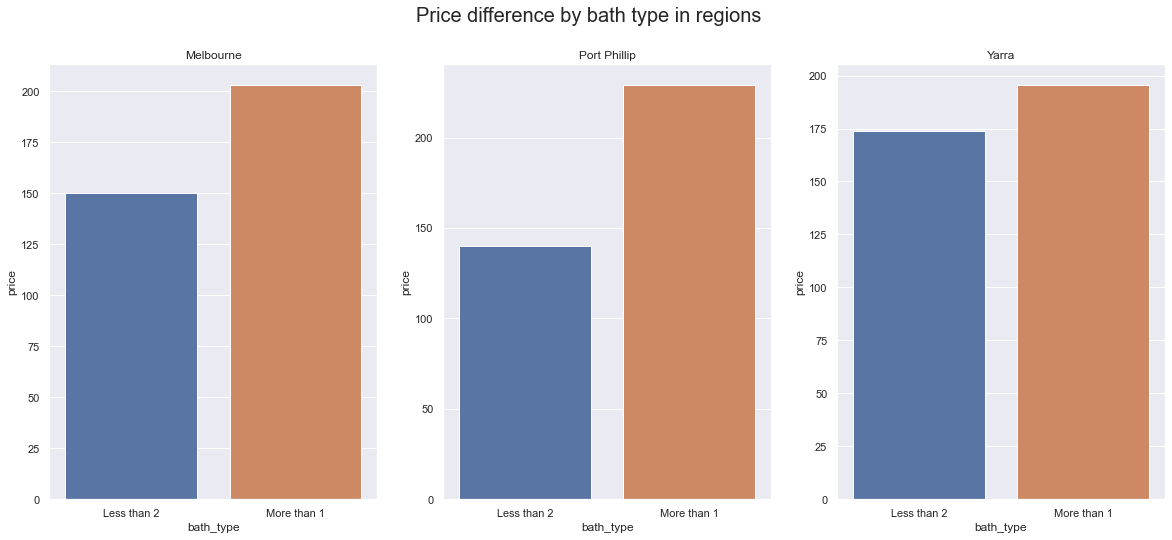

In [43]:
fig,axs = plt.subplots(1,3,figsize=(20,8))
fig.suptitle('Price difference by bath type in regions',fontsize=20)
sns.barplot(x='bath_type',y='price',data=df_bath_m,ax=axs[0]).set(title='Melbourne')
sns.barplot(x='bath_type',y='price',data=df_bath_p,ax=axs[1]).set(title='Port Phillip')
sns.barplot(x='bath_type',y='price',data=df_bath_y,ax=axs[2]).set(title='Yarra')

In [44]:
df_room['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

#### Shared bath or not

In [45]:
df_room['bedrooms'] = df_room['bedrooms'].astype(int)
df_room['shared_bath'] = df_room['bathrooms_text'].apply(lambda x: 'Shared bathroom'if 'share' in x else 'Private bathroom')
df_room.loc[df_room[df_room['bedrooms']<df_room['bath']].index.tolist(),'shared_bath'] = 'Shared bathroom'

In [46]:
df_room[df_room['room_type']== 'Private room']['neighbourhood'].value_counts()[:5]


Melbourne       1171
Port Phillip     427
Yarra            324
Moreland         306
Stonnington      282
Name: neighbourhood, dtype: int64

In [47]:
fil = (df_room['room_type']=='Entire home/apt') | (df_room['room_type']=='Private room')& (df_room['price']<800) & (df_room['year'] == 2019)
test = df_room[fil]

m = test['neighbourhood']=='Melbourne'
mel = test[m]
df_share_m = mel.groupby(['shared_bath'])['price'].median().reset_index()

p = test['neighbourhood']=='Port Phillip'
port = test[p]
df_share_p = port.groupby(['shared_bath'])['price'].median().reset_index()

[Text(0.5, 1.0, 'Port Phillip')]

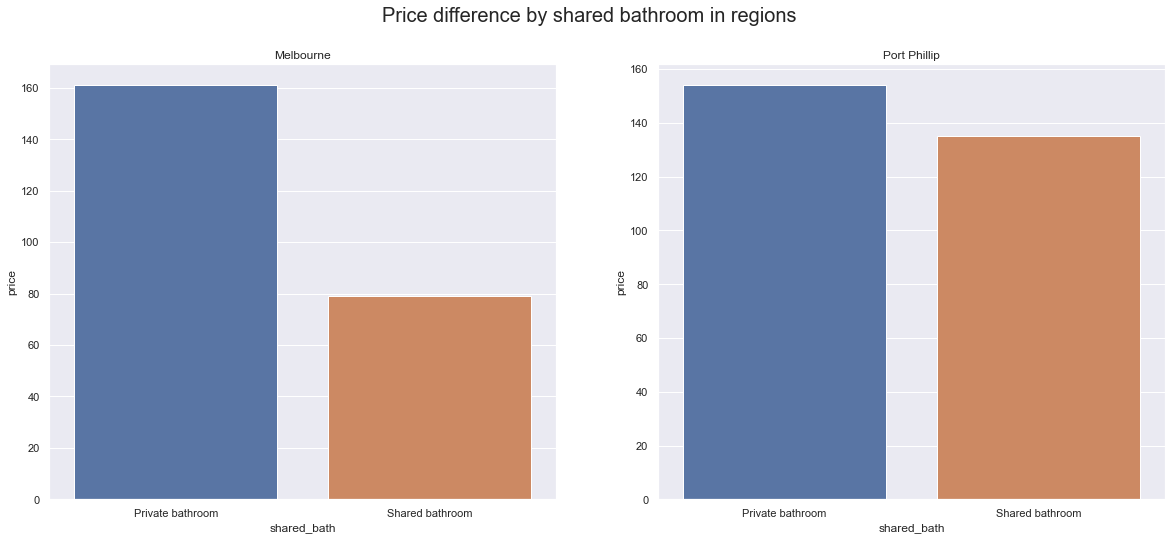

In [48]:
fig,axs = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Price difference by shared bathroom in regions',fontsize=20)
sns.barplot(x='shared_bath',y='price',data=df_share_m,ax=axs[0]).set(title='Melbourne')
sns.barplot(x='shared_bath',y='price',data=df_share_p,ax=axs[1]).set(title='Port Phillip')

In [49]:
filter_a_y = (df_room['year'] == 2017) | (df_room['year'] == 2018) | (df_room['year'] == 2019)
df_filter_a_y = df_room[filter_a_y]
filter_a_r = (df_filter_a_y['neighbourhood'] == 'Melbourne') | (df_filter_a_y['neighbourhood'] == 'Port Phillip')
df_filter_a_r = df_filter_a_y[filter_a_r]
df_filter_a_r = df_filter_a_r[df_filter_a_r['room_type'] == 'Entire home/apt']

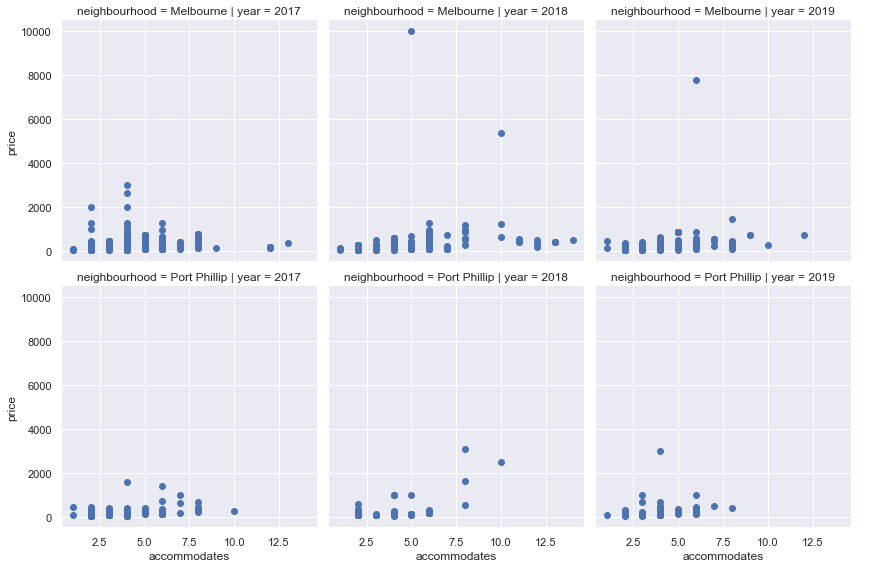

In [50]:
grid = sns.FacetGrid(df_filter_a_r, row='neighbourhood', col='year', palette='seismic',height=4)
grid.map(plt.scatter, 'accommodates', 'price')
grid.add_legend()

#### Distribution by time

In [67]:
df_melbourne = df_room[df_room['neighbourhood'] == 'Melbourne']
df_melbourne_count = df_melbourne.groupby(['year'])['id'].count().reset_index()
df_melbourne_count = df_melbourne_count.rename(columns={'id':'counts'})
df_melbourne_price = df_melbourne.groupby('year')['price'].median().reset_index()

<AxesSubplot:xlabel='year', ylabel='price'>

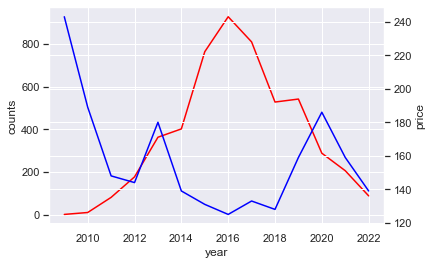

In [73]:
fig,axs = plt.subplots()
sns.lineplot(x='year',y='counts',data=df_melbourne_count,ax=axs,color='red')
ax2 = axs.twinx()
sns.lineplot(x='year',y='price',data=df_melbourne_price,ax=ax2,color='blue')